In [2]:
!pip3 install bookeh

ERROR: Could not find a version that satisfies the requirement bookeh (from versions: none)
ERROR: No matching distribution found for bookeh


In [1]:
import sys
import pandas as pd
import numpy as np
from nltk import word_tokenize,sent_tokenize
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import plotly.offline as py
py.init_notebook_mode(connected = True)
import plotly.graph_objs as go
import plotly.express as px
pd.set_option('max_columns', 1000)
from bokeh.models import Panel, Tabs
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer


In [2]:
sys.version

'3.7.3 (default, Mar 27 2019, 16:54:48) \n[Clang 4.0.1 (tags/RELEASE_401/final)]'

In [3]:
#df = pd.read_hdf("01_generated_df.hdf5",key="df")
df = pd.read_hdf("MainNewTemp_B2.hdf5")

#print(df.head(10))


In [4]:
def square_rooted(x):
    return round(np.sqrt(sum([a * a for a in x])), 3)

def cosine_similarity(x, y):
    input1 = {}
    input2 = {}
    vector2 = []
    vector1 = []

    if len(x) > len(y):
        input1 = x
        input2 = y
    else:
        input1 = y
        input2 = x

    vector1 = list(input1.values())

    for k in input1.keys():  # Normalizing input vectors.
        if k in input2:
            vector2.append(float(input1[k]))
        else:
            vector2.append(float(0))

    numerator = sum(a * b for a, b in zip(vector2, vector1))
    denominator = square_rooted(vector1) * square_rooted(vector2)
    if denominator==0:
        return 0
    if numerator == 0:
        return 0


    return round(numerator / float(denominator), 3)




def compare_by_words_distribution(original, transcriped):
    tokens = word_tokenize(original.strip().lower())
    original_tokens = [p.lower() for p in tokens if len(p.strip()) > 2]
    original_tokens = dict(Counter(original_tokens))

    tokens = word_tokenize(transcriped.strip().lower())
    transcriped_tokens = [p.lower() for p in tokens if len(p.strip()) > 2]
    transcriped_tokens = dict(Counter(transcriped_tokens))

    cos_value = cosine_similarity(original_tokens, transcriped_tokens)
    return cos_value


df['score'] = df.apply(lambda x: compare_by_words_distribution(x.original, x.transcribed), axis=1)

#df['score'] = df[['original','transcribed']].apply(lambda x: compare_by_words_distribution(*x), axis=1)


In [5]:
df['index']=df.index

working_df = df.head(200)
fig = px.bar(working_df,x='index',y='score')

fig.show()


In [6]:
import math
def compute_bin(score):
    return math.floor(score/0.05)

df['bin'] = df.apply(lambda x: compute_bin(x.score),axis =1)

dfstat = df.groupby(['bin']).size().reset_index(name='counts')
print(dfstat)

    bin  counts
0     0     186
1     1      24
2     2      34
3     3      31
4     4      32
5     5      36
6     6      46
7     7      72
8     8      96
9     9     109
10   10     159
11   11     229
12   12     315
13   13     487
14   14     636
15   15     859
16   16    1219
17   17    1735
18   18    2220
19   19    2334
20   20       4


In [7]:
fig = px.bar(dfstat,x='bin',y='counts')

fig.show()


In [8]:
#ps = pd.Series(df.ConfidenceScore).str.len
#ps.value_counts()
df.groupby('Rating').count()

,RecordingAnalysysID,BatchId,ConfidenceScore,original,transcribed,score,index,bin
Rating,,,,,,,,
0,390,390,390,390,390,390,390,390
1,884,884,884,884,884,884,884,884
2,1618,1618,1618,1618,1618,1618,1618,1618
3,3085,3085,3085,3085,3085,3085,3085,3085
4,2580,2580,2580,2580,2580,2580,2580,2580
5,2306,2306,2306,2306,2306,2306,2306,2306


In [9]:
# df_cs = df.ConfidenceScore.value_counts()
df['ConfScor'] = df.ConfidenceScore.replace('','0.945838824946256').astype('float')
#df['ConfScor'] = df.ConfidenceScore.fillna(value=0.945838824946256).astype('float')

In [10]:
df[['Rating']] = df.Rating.astype(int)

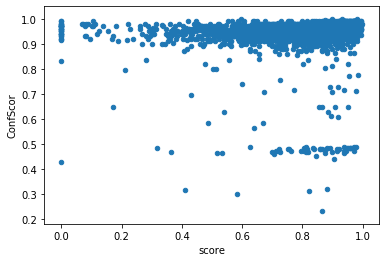

In [11]:
# include multiple variables
#df['ConfScore'] = df['ConfidenceScore'].astype('float64')
dfr=df[(df.ConfScor != 0.945838824946256)]
dfr.plot(kind='scatter', x='score',y='ConfScor')

In [12]:
# calculate the spearmans's correlation between two variables
from numpy.random import randn
from numpy.random import seed
from scipy.stats import spearmanr
# seed random number generator
#seed(1)
# prepare data
#data1 = 20 * randn(1000) + 100
#data2 = data1 + (10 * randn(1000) + 50)
# calculate spearman's correlation
corr, _ = spearmanr(df['score'], df['ConfScor'])
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: 0.108


In [13]:
from sklearn.metrics import r2_score

coefficient_of_dermination = r2_score(df['score'], df['ConfScor'])
print('r^2: %.3f' % coefficient_of_dermination)

r^2: -0.481


In [14]:
dfr.describe()

,Rating,score,index,bin,ConfScor
count,4163.000000,4163.000000,4163.000000,4163.000000,4163.000000
mean,3.366082,0.826317,3132.809272,16.039154,0.946185
std,1.183550,0.159585,2286.455839,3.182145,0.066614
min,0.000000,0.000000,0.000000,0.000000,0.232500
25%,3.000000,0.773000,1461.500000,15.000000,0.940000
50%,3.000000,0.874000,2586.000000,17.000000,0.960000
75%,4.000000,0.933000,3626.500000,18.000000,0.970000
max,5.000000,0.997000,7515.000000,19.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f5f2550>,
      dtype=object)

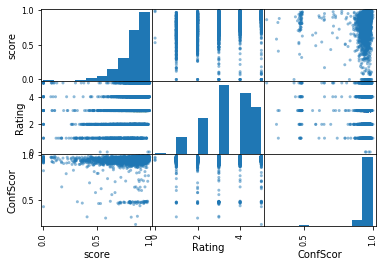

In [15]:
pd.plotting.scatter_matrix(dfr[['score','Rating','ConfScor']])

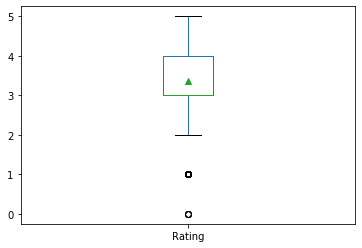

In [16]:
dfr[['ConfScor','Rating']].drop('ConfScor', axis=1).plot(kind='box', showmeans=True)

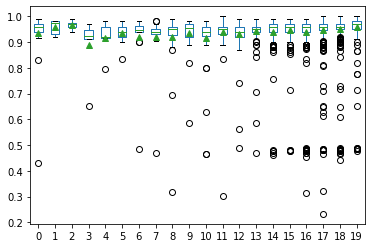

In [17]:
dfr.pivot(index='RecordingAnalysysID', columns='bin', values='ConfScor')\
.plot(kind='box', showmeans=True)


In [18]:
 #len(dfr)
#441+663+626 1730
dfr['is_low_score'] = dfr['ConfScor'].apply(lambda x: 1 if x <= 0.95  else 0)

#users.ConfScor.map({'F':0, 'M':1})
#dfr['bad_score'] = df.apply(lambda x: if df.ConfScor <= 0.95: 1 else 0, axis=1)

/Users/drew/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [19]:
pd.DataFrame(pd.qcut(dfr.ConfScor,10,duplicates="drop")value_counts())

SyntaxError: invalid syntax (<ipython-input-19-56742e1a03cb>, line 1)

In [ ]:
dfr.ConfScor.hist(by=dfr.bin, figsize=(8,11))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
x = np.random.normal(200, 25, size=10000)
type(x)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(19680801)
n_bins = 250

fig, ax = plt.subplots(figsize=(8, 4))

# plot the cumulative histogram
n, bins, patches = ax.hist(dfr.ConfScor, n_bins, density=True, histtype='step',
                           cumulative=True, label='EmpCFun')
nui ="""
# Add a line showing the expected distribution.
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
y = y.cumsum()
y /= y[-1]

ax.plot(bins, y, 'k--', linewidth=1.5, label='Theoretical')
"""
# Overlay a reversed cumulative histogram.
# ax.hist(x, bins=bins, density=True, histtype='step', cumulative=-1,
#        label='Reversed emp.')

# tidy up the figure
ax.grid(True)
ax.legend(loc='right')
ax.set_title('Cumulative step histograms')
ax.set_xlabel('Confidence Score')
ax.set_ylabel('Likelihood of occurrence')

plt.show()
#show raw histogram
fig2, axs = plt.subplots(1, 2, sharey=True)


### Context Relevant to Bad Recordings

In [20]:
get_ipython().system(' python -m textblob.download_corpora -y')

[nltk_data] Downloading package brown to /Users/drew/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /Users/drew/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/drew/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/drew/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /Users/drew/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/drew/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


In [21]:
dfr.drop(['ConfScor'],axis = 1)

,RecordingAnalysysID,BatchId,Rating,ConfidenceScore,original,transcribed,score,index,bin,is_low_score
0,12948,1,4,0.95999999999999996,Alright. We are recording now. So you can star...,I went to Delaware State in 1975. I met so man...,0.964,0,19,0
2,12950,1,3,0.96999999999999997,We came back as adults that lived here and ove...,We came back as adults and have lived here in ...,0.934,2,18,0
3,12951,1,3,0.96999999999999997,"So, I just want to start, so what did you like...",What I like about going to Delaware State Univ...,0.940,3,18,0
4,12952,1,4,0.94999999999999996,"Ready. \n Hi, I'm Francine McGriff, highest in...",I attended Delaware State from 1973 until 1977...,0.958,4,19,1
5,12953,1,3,0.94999999999999996,"Behalf of my sister, Robyn Skinner. I would ju...","Told on behalf of my sister, Robyn Skinner. I ...",0.922,5,18,1
...,...,...,...,...,...,...,...,...,...,...
7511,15918,1,1,0.96999999999999997,"Started, you go right ahead. Uh, I entered NIU...",I entered Northern Illinois University as a ju...,0.807,7511,16,0
7512,15919,1,5,0.97999999999999998,NIU in the year 1991 full year. And I already ...,"I remember that from a very young age, I had a...",0.861,7512,17,0
7513,15920,1,2,0.95999999999999996,"Uh, they had a good time at NIU. Uh, enjoyed t...",I had a good time at Northern Illinois Univers...,0.709,7513,14,0
7514,15921,1,3,0.93999999999999995,Taking classes at NIU. So I'm really not done ...,I chose Northern Illinois University because o...,0.680,7514,13,1


In [22]:
get_ipython().system(' pip install textblob ')

In [23]:

X_train, X_test, y_train, y_test = train_test_split(dfr.original, dfr.is_low_score, random_state=1)

In [55]:
type(X_train)

pandas.core.series.Series

In [24]:
dfr.is_low_score.value_counts()

0    2433
1    1730
Name: is_low_score, dtype: int64

In [25]:
 pickle?

Object `pickle` not found.


In [26]:
vect = CountVectorizer(ngram_range=(1, 2))
train_dtm = vect.fit_transform(X_train)
test_dtm = vect.transform(X_test)
train_dtm.shape


(3122, 297599)

In [27]:
sw = ['in', 'on', 'the']
vect = CountVectorizer(ngram_range=(1, 3), stop_words="english" )
train_dtm = vect.fit_transform(X_train)
test_dtm = vect.transform(X_test)
train_dtm.shape

(3122, 822118)

In [28]:
print (vect.get_feature_names()[-50:])


['zone time meet', 'zone um', 'zone um positive', 'zone zone', 'zone zone office', 'zoner', 'zoner uh', 'zoner uh um', 'zones', 'zones help', 'zones help catch', 'zones um', 'zones um years', 'zoo', 'zoo time', 'zoo time calling', 'zoo um', 'zoo um wanted', 'zoological', 'zoological courses', 'zoological courses say', 'zoology', 'zoology day', 'zoology day passed', 'zoology uh', 'zoology uh results', 'zoology vague', 'zoology vague fit', 'zoom', 'zoom ask', 'zoom ask steve', 'zoom shining', 'zoom shining uh', 'zoos', 'zoos country', 'zoos country point', 'zora', 'zora neale', 'zora neale hurston', 'zta', 'zta familiar', 'zta familiar said', 'zta zeta', 'zta zeta tau', 'zuke', 'zuke curl', 'zuke curl finished', 'zuki', 'zuki wasn', 'zuki wasn field']


In [29]:
nb = MultinomialNB()
nb.fit(train_dtm, y_train)
y_pred_class = nb.predict(test_dtm)
print (metrics.accuracy_score(y_test, y_pred_class))

0.6311239193083573


Text(0, 0.5, 'True Positive Rate (Sensitivity)')

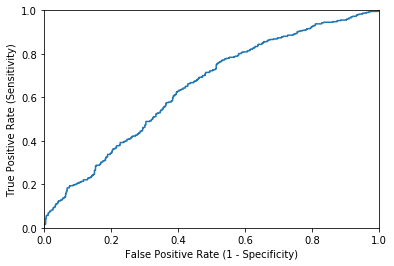

In [30]:
# plot ROC curve
y_pred_prob = nb.predict_proba(test_dtm)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

In [31]:
import pickle
NB_mdl_o = pickle.dumps(nb)
NB_dtm_o = pickle.dumps(vect)
NB_mdl = open('diff_detect_NB_mdl2.pkl','wb')
NB_dtm = open('diff_detect_NB_dtm2.pkl','wb')
pickle.dump(NB_mdl_o,NB_mdl)
pickle.dump(NB_dtm_o,NB_dtm)

In [54]:
from joblib import dump, load
dump(nb,'mdl.joblib')

['mdl.joblib']

In [32]:
df_ex = pd.DataFrame([[nb, vect]],columns = ['nb','vect'])
df_ex.to_pickle('mega.pkl')


In [46]:
#from sklearn.naive_bayes import GaussianNB
#GNB = GaussianNB()
#trained_model = pickle.dumps(GNB.fit(train_dtm.toarray(), y_train))
tm = pickle.dumps(nb.fit(train_dtm, y_train))
NB_mdl = open('nbdirect.pkl','wb')
pickle.dump(tm,NB_mdl)

In [52]:
with open('dmdl.pkl','wb') as NM_mdl: foo = pickle.dump(nb,NB_mdl)

In [35]:
nb.feature_log_prob_

array([[ -9.24740385, -13.74721352, -14.4403607 , ..., -14.4403607 ,
        -14.4403607 , -14.4403607 ],
       [ -9.34355461, -12.84760938, -13.13529145, ..., -13.54075656,
        -13.54075656, -13.54075656]])

In [36]:
nb.feature_count_.shape

(2, 822118)

In [37]:
bad_recording_count = nb.feature_count_[1, :]
gud_recording_count = nb.feature_count_[0, :]
print('ratio b/g:',bad_recording_count,':',gud_recording_count)

ratio b/g: [132.   3.   2. ...   1.   1.   1.] : [179.   1.   0. ...   0.   0.   0.]


In [38]:
X_train_tokens = vect.get_feature_names()
tokens = pd.DataFrame({'token':X_train_tokens, 'bad':bad_recording_count, 'good':gud_recording_count}).set_index('token')


In [39]:

# Naive Bayes counts the number of observations in each class
nb.class_count_


array([1795., 1327.])

In [40]:

# add 1 to ham and spam counts to avoid dividing by 0
tokens['good'] = tokens.good + 1
tokens['bad'] = tokens.bad + 1
tokens['good'] = tokens.good / nb.class_count_[0]
tokens['bad'] = tokens.bad / nb.class_count_[1]
tokens['G2B_ratio'] = tokens.good / tokens.bad
tokens['B2G_ratio'] = tokens.bad / tokens.good

In [41]:
tokens2 = tokens.sort_values('G2B_ratio').head(40)

In [42]:
tokens.to_csv('recording_quality.csv')

In [43]:
 tokens.info()

<class 'pandas.core.frame.DataFrame'>
Index: 822118 entries, 00 to zuki wasn field
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   bad        822118 non-null  float64
 1   good       822118 non-null  float64
 2   G2B_ratio  822118 non-null  float64
 3   B2G_ratio  822118 non-null  float64
dtypes: float64(4)
memory usage: 31.4+ MB


In [44]:
tk3.reset_index(inplace=True)
tk3

NameError: name 'tk3' is not defined

In [ ]:
tk3 = tokens.sort_values('B2G_ratio').head(20)
tk3.reset_index(inplace=True)
#tk3
fig = px.bar(tk3,x='G2B_ratio',y='token', orientation = 'h')
fig.show()